# Project: Data Analysis for Hospitals

from JetBrains Academy, a project for track `Introductory Machine Learning in Python`

The stages description from JetBrains will be marked by 

> blockquotes

My comments will be written in standard format.

## Stage 1
>
> 1. Read 3 CSV files containing the datasets.
> 2. Print the first 20 rows of each data frame. Use the following order: `general`, `prenatal`, `sports`.
>

`pd.set_option('display.max_columns', 8)` sets the number of columns to display, and is needed by JetBrains in first few stages for their testing engine. I don't need it here but remember to uncomment the line if you copy my code to yours.

In [1]:
import pandas as pd
# pd.set_option('display.max_columns', 8)

df_gen = pd.read_csv('general.csv')
df_pren = pd.read_csv('prenatal.csv')
df_sp = pd.read_csv('sports.csv')

print(df_gen.head(20))
print(df_pren.head(20))
print(df_sp.head(20))

    Unnamed: 0 hospital gender  age  height  weight   bmi    diagnosis  \
0            0  general    man   33    1.64      66  24.9         cold   
1            1  general    man   48    1.93     106  28.4      stomach   
2            2  general  woman   23    1.54      63  26.8         cold   
3            3  general    man   27    1.94     103  27.5      stomach   
4            4  general  woman   22    1.76      74  24.0  dislocation   
5            5  general    man   46    1.90      96  26.6        heart   
6            6  general  woman   68    1.80      85  26.4      stomach   
7            7  general    man   35    1.57      61  25.0         cold   
8            8  general  woman   50    1.86      86  25.0       sprain   
9            9  general    man   25    1.79      82  25.5        heart   
10          10  general    man   27    1.85      86  25.2        heart   
11          11  general    man   57    1.86      95  27.5      stomach   
12          12  general    man   29   

## Stage 2
Renaming, merging, basic clean-up

>
> 3. rename columns for hospital type and gender in prenatal and sports so they match general hospital naming
> 4. merge the dataframes into one
> 5. delete the `Unnamed: 0` column
> 6. delete all the empty rows
>

In [2]:
# let's look at the differences in mentioned columns naming

print('Columns in general hospital:', df_gen.columns[1:3],
     '\nColumns in prenatal hospital:', df_pren.columns[1:3],
     '\nColumns in sports hospital:', df_sp.columns[1:3])

Columns in general hospital: Index(['hospital', 'gender'], dtype='object') 
Columns in prenatal hospital: Index(['HOSPITAL', 'Sex'], dtype='object') 
Columns in sports hospital: Index(['Hospital', 'Male/female'], dtype='object')


In [3]:
# before the merge, we need to match it

df_pren = df_pren.rename(columns={
    'HOSPITAL': 'hospital',
    'Sex': 'gender'
})

df_sp = df_sp.rename(columns={
    'Hospital': 'hospital',
    'Male/female': 'gender'
})

In [4]:
print('Columns in general hospital:', df_gen.columns[1:3],
     '\nColumns in prenatal hospital:', df_pren.columns[1:3],
     '\nColumns in sports hospital:', df_sp.columns[1:3])

Columns in general hospital: Index(['hospital', 'gender'], dtype='object') 
Columns in prenatal hospital: Index(['hospital', 'gender'], dtype='object') 
Columns in sports hospital: Index(['hospital', 'gender'], dtype='object')


Now that we have a match, we can merge the dataframes (task 4).

In [5]:
df = pd.concat([df_gen, df_pren, df_sp], ignore_index=True)
df.head(20)

,Unnamed: 0,hospital,gender,age,height,weight,bmi,diagnosis,blood_test,ecg,ultrasound,mri,xray,children,months
0,0,general,man,33.0,1.64,66.0,24.9,cold,t,NaN,NaN,NaN,NaN,NaN,NaN
1,1,general,man,48.0,1.93,106.0,28.4,stomach,t,NaN,t,NaN,NaN,NaN,NaN
2,2,general,woman,23.0,1.54,63.0,26.8,cold,t,NaN,NaN,NaN,NaN,NaN,NaN
3,3,general,man,27.0,1.94,103.0,27.5,stomach,t,NaN,t,NaN,NaN,NaN,NaN
4,4,general,woman,22.0,1.76,74.0,24.0,dislocation,NaN,NaN,NaN,NaN,f,NaN,NaN
5,5,general,man,46.0,1.90,96.0,26.6,heart,t,t,NaN,NaN,NaN,NaN,NaN
6,6,general,woman,68.0,1.80,85.0,26.4,stomach,f,NaN,f,NaN,NaN,NaN,NaN
7,7,general,man,35.0,1.57,61.0,25.0,cold,t,NaN,NaN,NaN,NaN,NaN,NaN
8,8,general,woman,50.0,1.86,86.0,25.0,sprain,NaN,NaN,NaN,NaN,f,NaN,NaN
9,9,general,man,25.0,1.79,82.0,25.5,heart,t,t,NaN,NaN,NaN,NaN,NaN


In [6]:
df.shape

(1006, 15)

In [7]:
# let's drop the redundant column standing out in the df
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,hospital,gender,age,height,weight,bmi,diagnosis,blood_test,ecg,ultrasound,mri,xray,children,months
0,general,man,33.0,1.64,66.0,24.9,cold,t,NaN,NaN,NaN,NaN,NaN,NaN
1,general,man,48.0,1.93,106.0,28.4,stomach,t,NaN,t,NaN,NaN,NaN,NaN
2,general,woman,23.0,1.54,63.0,26.8,cold,t,NaN,NaN,NaN,NaN,NaN,NaN
3,general,man,27.0,1.94,103.0,27.5,stomach,t,NaN,t,NaN,NaN,NaN,NaN
4,general,woman,22.0,1.76,74.0,24.0,dislocation,NaN,NaN,NaN,NaN,f,NaN,NaN


Perfect!

In the last task of this stage, they want us to remove rows that are completely empty. Let's pause to look for them first, how do we know they are in our dataframe?

In [8]:
df[df.isna().all(axis=1)]

,hospital,gender,age,height,weight,bmi,diagnosis,blood_test,ecg,ultrasound,mri,xray,children,months
564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
794,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
861,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


So we have 6 completely empty rows. We do not need them, right?

But remember to drop **only** these 6 rows. We will need other rows with some empty cells for later.

In [9]:
df.dropna(how='all', inplace=True)
df[df.isna().all(axis=1)]

,hospital,gender,age,height,weight,bmi,diagnosis,blood_test,ecg,ultrasound,mri,xray,children,months


In [10]:
# let's also check how the shape of our df changed

df.shape

(1000, 14)

We still have lots to do, so time for:

## Stage 3

where we improve the dataset a bit.

>
> 7. Correct all the gender column values to `f` and `m` respectively
> 8. Replace the NaN values in the `gender` column of the `prenatal` hospital with `f`
> 9. Replace the NaN values in the `bmi`, `diagnosis`, `blood_test`, `ecg`, `ultrasound`, `mri`, `xray`, `children`, `months` columns with zeros.
> 10. Print shape of the resulting data frame.
> 11. Print random 20 rows of the resulting data frame. For the reproducible output set `random_state=30`.
>



As they point out, the `gender` column contains different values that represent the same. To see that, check:

In [11]:
df['gender']

0          man
1          man
2        woman
3          man
4        woman
         ...  
1001      male
1002      male
1003      male
1004    female
1005    female
Name: gender, Length: 1000, dtype: object

In [12]:
df['gender'].unique()

array(['man', 'woman', nan, 'female', 'male'], dtype=object)

You can correct it with `replace` function and simple dictionary:

In [13]:
df['gender'].replace({'man': 'm', 'male': 'm', 'female': 'f', 'woman': 'f'}, inplace=True)

In [14]:
df['gender'].unique()

array(['m', 'f', nan], dtype=object)

What about the `nan` values? How do we check them?

In [15]:
df[df['gender'].isna()]

,hospital,gender,age,height,weight,bmi,diagnosis,blood_test,ecg,ultrasound,mri,xray,children,months
461,prenatal,NaN,27.0,1.63,74.0,28.0,pregnancy,t,t,t,NaN,f,0.0,3.0
462,prenatal,NaN,18.0,1.70,89.0,31.3,pregnancy,t,t,t,NaN,f,1.0,5.0
463,prenatal,NaN,34.0,1.65,67.0,24.9,pregnancy,t,t,t,NaN,f,1.0,5.0
464,prenatal,NaN,29.0,1.58,71.0,28.7,pregnancy,t,t,t,NaN,f,2.0,3.0
465,prenatal,NaN,33.0,1.51,57.0,25.3,pregnancy,t,t,t,NaN,f,1.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784,prenatal,NaN,32.0,1.80,76.0,23.8,pregnancy,t,t,t,NaN,f,2.0,2.0
785,prenatal,NaN,23.0,1.57,67.0,27.3,pregnancy,t,t,t,NaN,f,2.0,7.0
786,prenatal,NaN,31.0,1.57,71.0,28.8,pregnancy,t,t,t,NaN,f,1.0,9.0
787,prenatal,NaN,31.0,1.71,74.0,25.3,pregnancy,t,t,t,NaN,f,1.0,2.0


They ask us to replace the `NaN`s with `f` because all of these values come from prenatal hospital. But how do we check that ourselves?

There are many ways to do that but the quickest for me was to simply check if the number of rows for prenatal hospital is also `325`:

In [16]:
df[df['hospital']=='prenatal'].shape[0]

325

Yup, there's a match, I think we can trust them and fill the rest of `NaN`s in `gender` to `f`:

In [17]:
df['gender'].fillna('f', inplace=True)

In [18]:
df[df['gender'].isna()]

,hospital,gender,age,height,weight,bmi,diagnosis,blood_test,ecg,ultrasound,mri,xray,children,months


---

In tasks 9-11 they want us to fill all other empty values with zeros and two prints, so let's do just that:

In [19]:
df.fillna(0, inplace=True)
print(df.shape)
print(df.sample(n=20, random_state=30))

(1000, 14)
     hospital gender   age  height  weight   bmi  diagnosis blood_test ecg  \
929    sports      f  23.0   6.809   259.0  27.3     sprain          0   f   
927    sports      m  21.0   6.052   172.0  22.9     sprain          0   f   
516  prenatal      f  20.0   1.650    66.0  24.3  pregnancy          t   t   
87    general      m  54.0   1.720    78.0  26.4    stomach          f   0   
885    sports      f  16.0   5.915   188.0  26.3     sprain          0   f   
463  prenatal      f  34.0   1.650    67.0  24.9  pregnancy          t   t   
112   general      m  77.0   1.690    77.0  27.1      heart          t   t   
297   general      m  56.0   1.480    54.0  25.1       cold          f   0   
417   general      f  26.0   1.650    69.0  25.3       cold          t   0   
660  prenatal      f  38.0   1.590    70.0  27.6  pregnancy          t   t   
344   general      f  60.0   1.410    56.0  28.3    stomach          t   0   
834    sports      f  21.0   5.585   184.0  29.0   fr

## Stage 4

where we do some statistics.
In this stage they use task counting from 1, so I will follow:

> 
> 1. Find the hospital with highest number of patients.
> 2. What is the share of the patients in the general hospital who suffer from stomach-related issues?
> 3. What is the share of the patients in the sports hospital who suffer from dislocation-related issues?
> 4. Calculte the difference in the median ages of the patients in the general and sports hospitals.
> 5. Find the hospital with the biggest number of t in the blood_test column. How many blood tests were taken?
>

To solve this stage, you need to print the answers, using the format they ask for:

- _The answer to the 1st question is_
- _The answer to the 2nd question is_
- _The answer to the 3rd question is_

So I will provide how I did that.

First, hospital with highest number of patients. Looks easy, that's what `value_counts` is for:

In [20]:
df['hospital'].value_counts()

general     461
prenatal    325
sports      214
Name: hospital, dtype: int64

But it shows us all hospital types an their number of patiens and we need only the highest number.
That's what `idxmax()` is for:

In [21]:
df['hospital'].value_counts().idxmax()

'general'

In [22]:
print('The answer to the 1st question is',
      df['hospital'].value_counts().idxmax())

The answer to the 1st question is general


---

In task 2, they want us to calculate the share of the patients in the general hospital who suffer from stomach-related issues.
Firstly, I created a subset for only general hospital, and then a subset for stomach diagnosis. You can do this in one line.

In [23]:
general_hospital = df[df['hospital'] == 'general']
gene_stomach = general_hospital[general_hospital['diagnosis'] == 'stomach']

To calculate the share, we need to do a simple division: the number of people suffering from stomach issues in general hospital (number of rows) by number of all general hospital's patients. The `.shape` is the quickest for that.

In [24]:
print('The answer to the 2nd question is',
      round(gene_stomach.shape[0] / general_hospital.shape[0], 3))

The answer to the 2nd question is 0.325


---

In task 3, almost the same calclations, but here I used `value_counts()` function:

In [25]:
# Share of the patients in the sports hospital
# who suffer from dislocation-related issues
sports = df[df['hospital'] == 'sports']
sports_disloc = sports[sports['diagnosis'] == 'dislocation']

print('The answer to the 3rd question is',
      round(sports_disloc.shape[0] / df.hospital.value_counts().sports, 3))

The answer to the 3rd question is 0.285


---

In task 4, we need to calculate the difference in the median ages of the patients in the general and sports hospitals.
That's easy with `loc`:

In [26]:
print('The answer to the 4th question is',
      df.loc[df['hospital'] == 'general', 'age'].median()
      - df.loc[df['hospital'] == 'sports', 'age'].median())

The answer to the 4th question is 19.0


---

In the task 5, they want us to find the hospital with the biggest number of `t` in the `blood_test` column, and answer question: how many blood tests were taken (in this particular hospital)?

For starters, I created a subset of only `hospital` and `blood_test` cols.
To calculate the answer, I used `value_counts()`:

In [27]:
hospitals_bloodtests = df[['blood_test', 'hospital']]
hospitals_bloodtests.value_counts()

blood_test  hospital
t           prenatal    325
0           sports      214
f           general     206
t           general     183
0           general      72
dtype: int64

We need the biggest number. Again, `idxmax()` will come in handy:

In [28]:
hospitals_bloodtests.value_counts().idxmax()

('t', 'prenatal')

But it shows a tuple and they ask only for hospital name. Slicing, it is, then:

In [29]:
hospitals_bloodtests.value_counts().idxmax()[1]

'prenatal'

What about the number of tests?

In [30]:
hospitals_bloodtests.value_counts().max()

325

In [31]:
print('The answer to the 5th question is',
      hospitals_bloodtests.value_counts().idxmax()[1],
      hospitals_bloodtests.value_counts().max())

The answer to the 5th question is prenatal 325


Time for:
## Stage 5
Visualize it!

>
> 1. What is the most common age of a patient among all hospitals? Plot a histogram and choose one of the following age ranges: 0-15, 15-35, 35-55, 55-70, or 70-80
> 2. What is the most common diagnosis among patients in all hospitals? Create a pie chart.
> 3. Build a violin plot of height distribution by hospitals. Try to answer the questions. What is the main reason for the gap in values? Why there are two peaks, which correspond to the relatively small and big values? No special form is required to answer this question.
>

Here, what they need us to do is create some data visualizations, using any library you want. I am using `matplotlib` and `seaborn`, they recommend `pandas`.

Their test validator is not checking the plots but definately checks if there are `plt.show()` passed 3 times. They require printing the:

- The answer to the 1st question is
- The answer to the 2nd question is
- The answer to the 3rd question is

as well. I just put the prints before `plt.show()` and it passed the tests.

Don't forget to import the libraries!

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

Task 1: a histogram showing patients' age with provided age ranges. For this, we need bins and then just plot:

<AxesSubplot:ylabel='Frequency'>

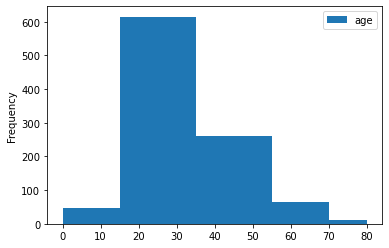

In [33]:
bins = [0, 15, 35, 55, 70, 80]
df.plot(y='age', kind='hist', bins=bins)

It's enought to see the most common age, but I wanted something prettier ;)

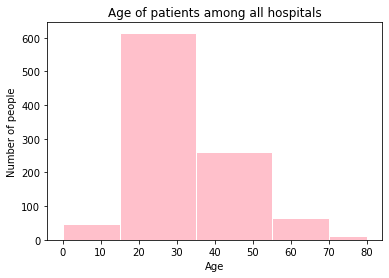

In [34]:
plt.hist(df['age'],
         bins=bins,
         color='pink',
         edgecolor='white')
plt.title('Age of patients among all hospitals')
plt.ylabel("Number of people")
plt.xlabel("Age")
# print('The answer to the 1st question: 15-35')  # uncomment if you copy it for the tester
plt.show()

---

Task 2: a pie chart with diagnoses. No special requirements here, you just need to use `plt.pie()` and pass the `diagnosis` column with `value_counts()`.
To answer the question, you need to assign labels or a legend.

I played with it a bit, but you don't have to:

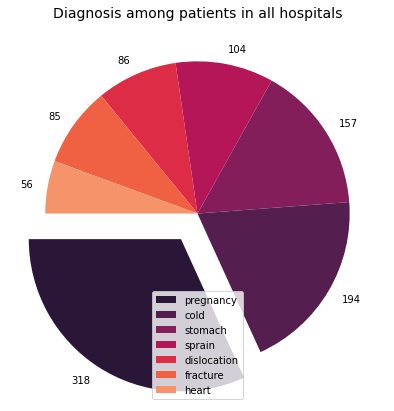

In [35]:
plt.figure(figsize=(9, 7))
plt.pie(df['diagnosis'].value_counts(),
       explode=[0.2, 0, 0, 0, 0, 0, 0],
       colors=sns.color_palette("rocket", 8),
       labels=df['diagnosis'].value_counts(),
       startangle=180)
plt.title('Diagnosis among patients in all hospitals', fontsize=14)
plt.legend(df['diagnosis'].value_counts().index,
          loc="lower center")
# print('The answer to the 2nd question: pregnancy')  # uncomment if you copy it for the tester
plt.show()

---

Last task is for building a violin plot of height distribution by hospitals.
Let's do just that:

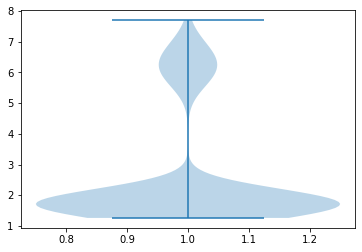

In [36]:
plt.violinplot(df['height'])
plt.show()

The questons are:

>
> What is the main reason for the gap in values?
>
> Why there are two peaks, which correspond to the relatively small and big values? 
>

Yes, indeed, this is weird. Let's look at the dataframe:

In [37]:
df['height'].sample(20)

154    1.780
387    1.770
906    5.991
561    1.640
684    1.630
508    1.520
731    1.730
121    1.530
985    6.389
692    1.460
633    1.790
717    1.530
607    1.500
273    1.740
23     1.770
318    1.700
323    1.940
171    1.730
22     1.890
749    1.760
Name: height, dtype: float64

This is height of a human, right? Values like 1.660 look okay, but there are no 7-meters humans, right? Even in sports, I guess?
The answer is simple: some hospitals stored the height data in meters and some in feet.

There you have it. You can just print such answer and complete the project:

In [38]:
print("The answer to the 3rd question: It's because of the difference in the unit of measurement of height")

The answer to the 3rd question: It's because of the difference in the unit of measurement of height


But I want to push it further and equalize this difference. It should have been done at the beginning, they ommitted this on purpose.

So task for the bravest: build the violin plot on corrected heights.

Firstly, I would like to know which hospital is using feet units and if there are any conditions.
My first shot is to simply check the means of the heights per hospital:

In [39]:
df.groupby('hospital')['height'].mean()

hospital
general     1.729219
prenatal    1.690862
sports      6.288612
Name: height, dtype: float64

Bingo! We can assume only sports hospital is using feet unit. So we can just replace the height in feet, calculating the value in meters.

In [52]:
df.loc[df['hospital'].eq('sports'), 'height'] = round(df['height'].apply(lambda n: n / 3.2808), 3)
df.sample(20)

,hospital,gender,age,height,weight,bmi,diagnosis,blood_test,ecg,ultrasound,mri,xray,children,months
767,prenatal,f,24.0,1.550,72.0,30.3,pregnancy,t,t,t,0,f,0.0,6.0
222,general,m,41.0,1.850,85.0,24.8,sprain,0,0,0,0,f,0.0,0.0
747,prenatal,f,32.0,1.860,103.0,29.8,pregnancy,t,t,t,0,f,1.0,4.0
479,prenatal,f,35.0,1.810,79.0,24.5,pregnancy,t,t,t,0,f,1.0,8.0
463,prenatal,f,34.0,1.650,67.0,24.9,pregnancy,t,t,t,0,f,1.0,5.0
843,sports,f,15.0,1.927,205.0,25.1,dislocation,0,f,0,f,t,0.0,0.0
952,sports,m,21.0,1.840,186.0,24.9,sprain,0,f,0,t,f,0.0,0.0
539,prenatal,f,31.0,1.740,66.0,22.1,pregnancy,t,t,t,0,f,0.0,6.0
690,prenatal,f,13.0,1.520,55.0,24.0,pregnancy,t,t,t,0,f,1.0,5.0
793,sports,m,19.0,1.827,209.0,28.4,dislocation,0,f,0,f,t,0.0,0.0


Finally, we can build a better plot:

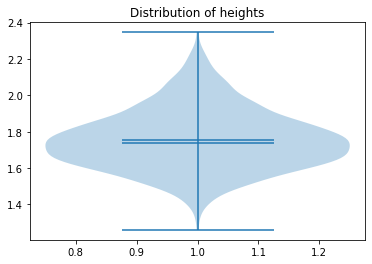

In [63]:
plt.violinplot(df['height'], showmeans=True, showmedians=True, showextrema=True)
plt.title('Distribution of heights')
plt.show()

Or with `seaborn`:

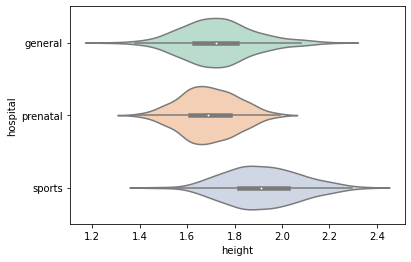

In [74]:
sns.violinplot(x='height', y='hospital', data=df, palette='Pastel2')
plt.show()

I hope this was helpful! 

I really recommend the JetBrains Academy learning tracks. I had some knowledge of `pandas`, `matplotlib`, `seaborn` before doing this project, but I think even total begginners can benefit from it.

Happy data analysis & plotting :)


Kate